In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
URL='https://github.com/xxjjxj945/projet3/blob/main/velo%2018-28.csv?raw=true' 
df = pd.read_csv(URL)
df

,index,datasetid,recordid,record_timestamp,fields.nombrevelosdisponibles,fields.nombreemplacementsdisponibles,fields.nom,fields.nombreemplacementsactuels,fields.idstation,fields.etat,fields.lastupdate,geometry.type,lat,long
0,0,vls-stations-etat-tr,2221c277807594541728c81443009d6194e0660b,2022-11-18 21:14:00,12,6,Saint-Georges Piscine,18,5509,En fonctionnement,2022-11-18 22:13:07,Point,48.112385,-1.674417
1,1,vls-stations-etat-tr,88a8871cd455b991aae541e2d60ebdab34840e3e,2022-11-18 21:14:00,2,14,Musée Beaux-Arts,16,5510,En fonctionnement,2022-11-18 22:13:07,Point,48.109601,-1.674080
2,2,vls-stations-etat-tr,6a596d3a6ff7227cb02bf4af30e007ff7bfc2adc,2022-11-18 21:14:00,1,22,Bonnets Rouges,23,5514,En fonctionnement,2022-11-18 22:13:07,Point,48.106846,-1.665814
3,3,vls-stations-etat-tr,3275da52a4ab0dd8471f662b9d0e7ce45c2b9fd5,2022-11-18 21:14:00,16,8,Colombier,24,5519,En fonctionnement,2022-11-18 22:13:07,Point,48.106103,-1.680594
4,4,vls-stations-etat-tr,2214892db3c9ce5a5ec75d609675a9b81c61aa44,2022-11-18 21:14:00,0,20,Pont de Nantes,20,5520,En fonctionnement,2022-11-18 22:13:07,Point,48.102015,-1.684015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75349,52,vls-stations-etat-tr,8af6894f961620ed6f05c7a280d17302cc3ed738,2022-11-28 05:05:00,13,11,Baud Chardonnet,24,5589,En fonctionnement,2022-11-28 06:04:07,Point,48.109950,-1.647933
75350,53,vls-stations-etat-tr,b30e6b358c22675d8d32cb6d6caf6ef053ff71ec,2022-11-28 05:05:00,13,13,Villejean-Université,26,5552,En fonctionnement,2022-11-28 06:04:07,Point,48.121074,-1.704280
75351,54,vls-stations-etat-tr,0028d30fd34359ed218cac2efd35a6f339b7313a,2022-11-28 05:05:00,11,17,Pontchaillou,28,5539,En fonctionnement,2022-11-28 06:04:07,Point,48.121481,-1.692737
75352,55,vls-stations-etat-tr,11e36beb0d3199e3896b16ead3208bcf21c6953f,2022-11-28 05:05:00,9,36,République,45,5501,En fonctionnement,2022-11-28 06:04:07,Point,48.110026,-1.678037


In [ ]:
#Changement datetime.

In [ ]:
df["record_timestamp"]=pd.to_datetime(df["record_timestamp"])

In [ ]:
df["fields.lastupdate"]=pd.to_datetime(df["fields.lastupdate"])

In [ ]:
#df["date"]=df['record_timestamp'].dt.date

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75354 entries, 0 to 75353
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   index                                 75354 non-null  int64         
 1   datasetid                             75354 non-null  object        
 2   recordid                              75354 non-null  object        
 3   record_timestamp                      75354 non-null  datetime64[ns]
 4   fields.nombrevelosdisponibles         75354 non-null  int64         
 5   fields.nombreemplacementsdisponibles  75354 non-null  int64         
 6   fields.nom                            75354 non-null  object        
 7   fields.nombreemplacementsactuels      75354 non-null  int64         
 8   fields.idstation                      75354 non-null  int64         
 9   fields.etat                           75354 non-null  object        
 10

In [ ]:
#Définition de la date de donées.

In [ ]:
df_week=df[(df["record_timestamp"]>="2022-11-19") & (df["record_timestamp"]<"2022-11-26")]

In [ ]:
df_week

,index,datasetid,recordid,record_timestamp,fields.nombrevelosdisponibles,fields.nombreemplacementsdisponibles,fields.nom,fields.nombreemplacementsactuels,fields.idstation,fields.etat,fields.lastupdate,geometry.type,lat,long
969,0,vls-stations-etat-tr,2221c277807594541728c81443009d6194e0660b,2022-11-19 00:04:00,9,9,Saint-Georges Piscine,18,5509,En fonctionnement,2022-11-19 01:03:06,Point,48.112385,-1.674417
970,1,vls-stations-etat-tr,88a8871cd455b991aae541e2d60ebdab34840e3e,2022-11-19 00:04:00,5,11,Musée Beaux-Arts,16,5510,En fonctionnement,2022-11-19 01:03:06,Point,48.109601,-1.674080
971,2,vls-stations-etat-tr,6a596d3a6ff7227cb02bf4af30e007ff7bfc2adc,2022-11-19 00:04:00,5,18,Bonnets Rouges,23,5514,En fonctionnement,2022-11-19 01:03:06,Point,48.106846,-1.665814
972,3,vls-stations-etat-tr,3275da52a4ab0dd8471f662b9d0e7ce45c2b9fd5,2022-11-19 00:04:00,16,8,Colombier,24,5519,En fonctionnement,2022-11-19 01:03:06,Point,48.106103,-1.680594
973,4,vls-stations-etat-tr,2214892db3c9ce5a5ec75d609675a9b81c61aa44,2022-11-19 00:04:00,5,15,Pont de Nantes,20,5520,En fonctionnement,2022-11-19 01:03:06,Point,48.102015,-1.684015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57166,52,vls-stations-etat-tr,8af6894f961620ed6f05c7a280d17302cc3ed738,2022-11-25 23:50:00,9,14,Baud Chardonnet,23,5589,En fonctionnement,2022-11-26 00:49:07,Point,48.109950,-1.647933
57167,53,vls-stations-etat-tr,b30e6b358c22675d8d32cb6d6caf6ef053ff71ec,2022-11-25 23:50:00,10,16,Villejean-Université,26,5552,En fonctionnement,2022-11-26 00:49:07,Point,48.121074,-1.704280
57168,54,vls-stations-etat-tr,0028d30fd34359ed218cac2efd35a6f339b7313a,2022-11-25 23:50:00,12,16,Pontchaillou,28,5539,En fonctionnement,2022-11-26 00:49:07,Point,48.121481,-1.692737
57169,55,vls-stations-etat-tr,11e36beb0d3199e3896b16ead3208bcf21c6953f,2022-11-25 23:50:00,19,26,République,45,5501,En fonctionnement,2022-11-26 00:49:07,Point,48.110026,-1.678037


In [ ]:
#Combien de place de vélo par station.

In [ ]:
df_station_velo=df.loc[0:56,["fields.nom","fields.nombreemplacementsactuels"]].sort_values(by="fields.nombreemplacementsactuels", ascending=False).head(20)
df_station_velo

,fields.nom,fields.nombreemplacementsactuels
33,Gares,50
55,République,44
39,Place Hoche,39
23,Place de Bretagne,35
21,Jules Ferry,31
25,Chèques Postaux,30
48,Les Gayeulles,30
49,Joliot-Curie - Chateaubriand,30
5,Oberthur,30
45,Beaulieu Chimie,30


<function matplotlib.pyplot.show(*args, **kw)>

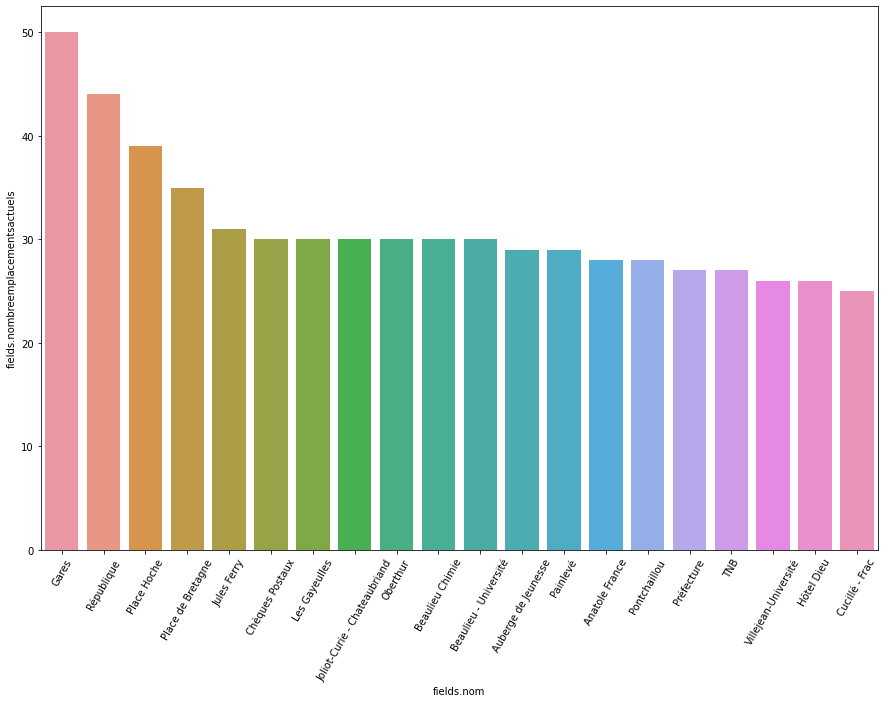

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_station_velo,x="fields.nom",y="fields.nombreemplacementsactuels")
plt.xticks(rotation=60)
plt.show

In [ ]:
df_station_velo.to_csv("nbr_velo_par_station.csv")

In [ ]:
#Etude de l'état de station.(En panne)

In [ ]:
df_week['fields.etat'].value_counts()

En fonctionnement    56011
En panne               191
Name: fields.etat, dtype: int64

In [ ]:
df_panne=df_week.loc[df_week["fields.etat"]=="En panne"]
df_panne

,index,datasetid,recordid,record_timestamp,fields.nombrevelosdisponibles,fields.nombreemplacementsdisponibles,fields.nom,fields.nombreemplacementsactuels,fields.idstation,fields.etat,fields.lastupdate,geometry.type,lat,long
978,9,vls-stations-etat-tr,e2827788048517fec3170426fe0f38690a32211e,2022-11-19 00:04:00,10,20,Beaulieu - Université,30,5548,En panne,2022-11-19 01:03:06,Point,48.121906,-1.639783
2136,27,vls-stations-etat-tr,77cac0a1ecd7f2af56c8668b201afe2a20e1c6bb,2022-11-19 03:25:00,3,21,Plaine de Baud,24,5546,En panne,2022-11-19 04:24:06,Point,48.112461,-1.643674
4090,43,vls-stations-etat-tr,4b28fecf9686dc851dcd589cce3afa777f34c669,2022-11-19 09:05:00,8,16,Cité Judiciaire,24,5543,En panne,2022-11-19 10:04:06,Point,48.104771,-1.684110
5333,32,vls-stations-etat-tr,3fc4dcda782b485e1eaeeae728be1b70bfbc44b9,2022-11-19 12:46:00,11,17,Anatole France,28,5533,En panne,2022-11-19 13:45:12,Point,48.118170,-1.688466
5457,42,vls-stations-etat-tr,bc23b982c96a853bb90665c1d574e7d9c204daed,2022-11-19 13:07:00,9,11,Marbeuf,20,5538,En panne,2022-11-19 14:06:07,Point,48.111749,-1.702077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53787,36,vls-stations-etat-tr,7e983dd5384bc61ab8d85cc20933235be20e7941,2022-11-25 14:00:00,4,24,TNB,28,5512,En panne,2022-11-25 14:59:07,Point,48.107748,-1.673711
54487,52,vls-stations-etat-tr,8af6894f961620ed6f05c7a280d17302cc3ed738,2022-11-25 16:01:00,11,12,Baud Chardonnet,23,5589,En panne,2022-11-25 17:00:12,Point,48.109950,-1.647933
56295,36,vls-stations-etat-tr,7e983dd5384bc61ab8d85cc20933235be20e7941,2022-11-25 21:20:00,9,19,TNB,28,5512,En panne,2022-11-25 22:19:07,Point,48.107748,-1.673711
56352,36,vls-stations-etat-tr,7e983dd5384bc61ab8d85cc20933235be20e7941,2022-11-25 21:30:00,9,19,TNB,28,5512,En panne,2022-11-25 22:29:05,Point,48.107748,-1.673711


In [ ]:
#Nombre de panne signalé par station par semaine.
df_nbrpanne=df_panne.groupby('fields.nom')['fields.etat'].count().sort_values(ascending=False).to_frame()


In [ ]:
df_nbrpanne=df_nbrpanne.rename(columns={'fields.etat':'nombre panne'})

In [ ]:
df_nbrpanne

,nombre panne
fields.nom,
Anatole France,78
Colombier,12
Gros-Chêne,11
TNB,9
Cucillé - Frac,6
Plaine de Baud,4
Metz - Sévigné,4
Hôtel Dieu,4
Préfecture,3


In [ ]:
df_nbrpanne.to_csv("df_nbrpanne.csv")

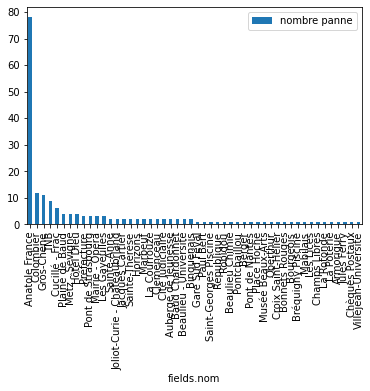

In [ ]:
df_nbrpanne.plot.bar();


In [ ]:
# La fréquence d'utilisation, et ajouté une colonne.
df_week['taux_emplacement_dispo']=(df_week['fields.nombreemplacementsdisponibles']/df_week['fields.nombreemplacementsactuels']).round(4)
df_week

<ipython-input-23-41a5eb4eeac7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['taux_emplacement_dispo']=(df_week['fields.nombreemplacementsdisponibles']/df_week['fields.nombreemplacementsactuels']).round(4)


,index,datasetid,recordid,record_timestamp,fields.nombrevelosdisponibles,fields.nombreemplacementsdisponibles,fields.nom,fields.nombreemplacementsactuels,fields.idstation,fields.etat,fields.lastupdate,geometry.type,lat,long,taux_emplacement_dispo
969,0,vls-stations-etat-tr,2221c277807594541728c81443009d6194e0660b,2022-11-19 00:04:00,9,9,Saint-Georges Piscine,18,5509,En fonctionnement,2022-11-19 01:03:06,Point,48.112385,-1.674417,0.5000
970,1,vls-stations-etat-tr,88a8871cd455b991aae541e2d60ebdab34840e3e,2022-11-19 00:04:00,5,11,Musée Beaux-Arts,16,5510,En fonctionnement,2022-11-19 01:03:06,Point,48.109601,-1.674080,0.6875
971,2,vls-stations-etat-tr,6a596d3a6ff7227cb02bf4af30e007ff7bfc2adc,2022-11-19 00:04:00,5,18,Bonnets Rouges,23,5514,En fonctionnement,2022-11-19 01:03:06,Point,48.106846,-1.665814,0.7826
972,3,vls-stations-etat-tr,3275da52a4ab0dd8471f662b9d0e7ce45c2b9fd5,2022-11-19 00:04:00,16,8,Colombier,24,5519,En fonctionnement,2022-11-19 01:03:06,Point,48.106103,-1.680594,0.3333
973,4,vls-stations-etat-tr,2214892db3c9ce5a5ec75d609675a9b81c61aa44,2022-11-19 00:04:00,5,15,Pont de Nantes,20,5520,En fonctionnement,2022-11-19 01:03:06,Point,48.102015,-1.684015,0.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57166,52,vls-stations-etat-tr,8af6894f961620ed6f05c7a280d17302cc3ed738,2022-11-25 23:50:00,9,14,Baud Chardonnet,23,5589,En fonctionnement,2022-11-26 00:49:07,Point,48.109950,-1.647933,0.6087
57167,53,vls-stations-etat-tr,b30e6b358c22675d8d32cb6d6caf6ef053ff71ec,2022-11-25 23:50:00,10,16,Villejean-Université,26,5552,En fonctionnement,2022-11-26 00:49:07,Point,48.121074,-1.704280,0.6154
57168,54,vls-stations-etat-tr,0028d30fd34359ed218cac2efd35a6f339b7313a,2022-11-25 23:50:00,12,16,Pontchaillou,28,5539,En fonctionnement,2022-11-26 00:49:07,Point,48.121481,-1.692737,0.5714
57169,55,vls-stations-etat-tr,11e36beb0d3199e3896b16ead3208bcf21c6953f,2022-11-25 23:50:00,19,26,République,45,5501,En fonctionnement,2022-11-26 00:49:07,Point,48.110026,-1.678037,0.5778


In [ ]:
#Moyen de fréquence d'utilisation.
df_frequence=df_week.groupby('fields.nom')['taux_emplacement_dispo'].mean().sort_values(ascending=False)
df_frequence

fields.nom
Plaine de Baud                  0.777983
Champs Manceaux                 0.772087
Gares                           0.767221
Champs Libres                   0.766862
TNB                             0.733804
Charles de Gaulle               0.730235
Pont de Châteaudun              0.698732
Croix Saint-Hélier              0.694437
Gros-Chêne                      0.690241
Bréquigny Piscine               0.683546
Musée Beaux-Arts                0.673969
Colombier                       0.667295
République                      0.666390
Oberthur                        0.651018
Chèques Postaux                 0.648545
Place de Bretagne               0.645600
Auberge de Jeunesse             0.645559
Mabilais                        0.642189
La Rotonde                      0.633030
Préfecture                      0.625197
Beaulieu - Université           0.624396
Jacques Cartier                 0.618819
Gare Sud Féval                  0.616830
Beaulieu Chimie                 0.615747
La Po

In [ ]:
# Taux de vélo disponible, et ajouté une colonne.
df_week['taux_velo_dispo']=(df_week['fields.nombrevelosdisponibles']/df_week['fields.nombreemplacementsactuels']).round(4)
df_week

<ipython-input-25-1070983f86b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['taux_velo_dispo']=(df_week['fields.nombrevelosdisponibles']/df_week['fields.nombreemplacementsactuels']).round(4)


,index,datasetid,recordid,record_timestamp,fields.nombrevelosdisponibles,fields.nombreemplacementsdisponibles,fields.nom,fields.nombreemplacementsactuels,fields.idstation,fields.etat,fields.lastupdate,geometry.type,lat,long,taux_emplacement_dispo,taux_velo_dispo
969,0,vls-stations-etat-tr,2221c277807594541728c81443009d6194e0660b,2022-11-19 00:04:00,9,9,Saint-Georges Piscine,18,5509,En fonctionnement,2022-11-19 01:03:06,Point,48.112385,-1.674417,0.5000,0.5000
970,1,vls-stations-etat-tr,88a8871cd455b991aae541e2d60ebdab34840e3e,2022-11-19 00:04:00,5,11,Musée Beaux-Arts,16,5510,En fonctionnement,2022-11-19 01:03:06,Point,48.109601,-1.674080,0.6875,0.3125
971,2,vls-stations-etat-tr,6a596d3a6ff7227cb02bf4af30e007ff7bfc2adc,2022-11-19 00:04:00,5,18,Bonnets Rouges,23,5514,En fonctionnement,2022-11-19 01:03:06,Point,48.106846,-1.665814,0.7826,0.2174
972,3,vls-stations-etat-tr,3275da52a4ab0dd8471f662b9d0e7ce45c2b9fd5,2022-11-19 00:04:00,16,8,Colombier,24,5519,En fonctionnement,2022-11-19 01:03:06,Point,48.106103,-1.680594,0.3333,0.6667
973,4,vls-stations-etat-tr,2214892db3c9ce5a5ec75d609675a9b81c61aa44,2022-11-19 00:04:00,5,15,Pont de Nantes,20,5520,En fonctionnement,2022-11-19 01:03:06,Point,48.102015,-1.684015,0.7500,0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57166,52,vls-stations-etat-tr,8af6894f961620ed6f05c7a280d17302cc3ed738,2022-11-25 23:50:00,9,14,Baud Chardonnet,23,5589,En fonctionnement,2022-11-26 00:49:07,Point,48.109950,-1.647933,0.6087,0.3913
57167,53,vls-stations-etat-tr,b30e6b358c22675d8d32cb6d6caf6ef053ff71ec,2022-11-25 23:50:00,10,16,Villejean-Université,26,5552,En fonctionnement,2022-11-26 00:49:07,Point,48.121074,-1.704280,0.6154,0.3846
57168,54,vls-stations-etat-tr,0028d30fd34359ed218cac2efd35a6f339b7313a,2022-11-25 23:50:00,12,16,Pontchaillou,28,5539,En fonctionnement,2022-11-26 00:49:07,Point,48.121481,-1.692737,0.5714,0.4286
57169,55,vls-stations-etat-tr,11e36beb0d3199e3896b16ead3208bcf21c6953f,2022-11-25 23:50:00,19,26,République,45,5501,En fonctionnement,2022-11-26 00:49:07,Point,48.110026,-1.678037,0.5778,0.4222


In [ ]:
#Etude de saturation.

In [ ]:
# 0 remplacement disponible par station.
df_saturation=df_week.loc[df_week['fields.nombreemplacementsdisponibles']==0]
df_saturation

,index,datasetid,recordid,record_timestamp,fields.nombrevelosdisponibles,fields.nombreemplacementsdisponibles,fields.nom,fields.nombreemplacementsactuels,fields.idstation,fields.etat,fields.lastupdate,geometry.type,lat,long,taux_emplacement_dispo,taux_velo_dispo
5054,38,vls-stations-etat-tr,b05fefa50fd93029412c2820b87efbb83562fa52,2022-11-19 11:56:00,25,0,Les Lices,25,5526,En fonctionnement,2022-11-19 12:55:08,Point,48.112766,-1.685037,0.0,1.0
5453,38,vls-stations-etat-tr,b05fefa50fd93029412c2820b87efbb83562fa52,2022-11-19 13:07:00,25,0,Les Lices,25,5526,En fonctionnement,2022-11-19 14:06:07,Point,48.112766,-1.685037,0.0,1.0
6023,38,vls-stations-etat-tr,b05fefa50fd93029412c2820b87efbb83562fa52,2022-11-19 14:46:00,25,0,Les Lices,25,5526,En fonctionnement,2022-11-19 15:45:09,Point,48.112766,-1.685037,0.0,1.0
6080,38,vls-stations-etat-tr,b05fefa50fd93029412c2820b87efbb83562fa52,2022-11-19 14:57:00,25,0,Les Lices,25,5526,En fonctionnement,2022-11-19 15:56:06,Point,48.112766,-1.685037,0.0,1.0
6571,16,vls-stations-etat-tr,baed41821869ff63debbcb7cc6b3980acf05a7bd,2022-11-19 16:27:00,24,0,Sainte-Anne,24,5505,En fonctionnement,2022-11-19 17:26:06,Point,48.114210,-1.680461,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53163,39,vls-stations-etat-tr,2c2028936086929fc8dce2701dc05eaadd34e0ca,2022-11-25 12:09:00,39,0,Place Hoche,39,5504,En fonctionnement,2022-11-25 13:08:07,Point,48.115074,-1.677073,0.0,1.0
53220,39,vls-stations-etat-tr,2c2028936086929fc8dce2701dc05eaadd34e0ca,2022-11-25 12:19:00,39,0,Place Hoche,39,5504,En fonctionnement,2022-11-25 13:18:08,Point,48.115074,-1.677073,0.0,1.0
53277,39,vls-stations-etat-tr,2c2028936086929fc8dce2701dc05eaadd34e0ca,2022-11-25 12:29:00,39,0,Place Hoche,39,5504,En fonctionnement,2022-11-25 13:28:07,Point,48.115074,-1.677073,0.0,1.0
53334,39,vls-stations-etat-tr,2c2028936086929fc8dce2701dc05eaadd34e0ca,2022-11-25 12:39:00,39,0,Place Hoche,39,5504,En fonctionnement,2022-11-25 13:38:06,Point,48.115074,-1.677073,0.0,1.0


In [ ]:
df_saturation.to_csv('saturation.csv')

In [ ]:
# l'heure de saturation. (Le matin vers 1h, 2h, et 3h; aussi vers midi, 16h etc)
df_satu=(df_saturation.groupby([df_saturation["record_timestamp"].dt.hour])["fields.nombreemplacementsdisponibles"].count().sort_values(ascending=False)).to_frame()
df_satu

,fields.nombreemplacementsdisponibles
record_timestamp,
2,12
1,12
3,11
4,9
12,8
7,8
6,7
11,7
19,6


In [ ]:
df_satu.to_csv("satu.csv")

In [ ]:
# Date de saturation.(Le samedi 20/11, le mercredi 23/11, et puis le lundi 21/11)
df_satu_jour=(df_saturation.groupby([df_saturation["record_timestamp"].dt.day])["fields.nombreemplacementsdisponibles"].count().sort_values(ascending=False)).to_frame()
df_satu_jour

,fields.nombreemplacementsdisponibles
record_timestamp,
20,35
23,35
21,20
22,13
19,9
25,9


In [ ]:
df_satu_jour.to_csv('df_satu_jour.csv')

In [ ]:
# Fréquence de saturation par station.
df_saturation.groupby('fields.nom')['fields.nombreemplacementsdisponibles'].value_counts().sort_values(ascending=False)

fields.nom            fields.nombreemplacementsdisponibles
Villejean-Université  0                                       50
Metz - Sévigné        0                                       33
Brest Verdun          0                                       13
Place Hoche           0                                        9
Bourgeois             0                                        5
Sainte-Anne           0                                        5
Les Lices             0                                        4
Berger                0                                        2
Name: fields.nombreemplacementsdisponibles, dtype: int64

In [ ]:
# Etude 0 vélo disponible.

In [ ]:
df_zerovelo=df_week.loc[df_week['fields.nombrevelosdisponibles']==0]
df_zerovelo              

,index,datasetid,recordid,record_timestamp,fields.nombrevelosdisponibles,fields.nombreemplacementsdisponibles,fields.nom,fields.nombreemplacementsactuels,fields.idstation,fields.etat,fields.lastupdate,geometry.type,lat,long,taux_emplacement_dispo,taux_velo_dispo
1016,47,vls-stations-etat-tr,f31381b27f50bb4bc23672b3ea5cc7abfca309c3,2022-11-19 00:04:00,0,18,Gros-Chêne,18,5578,En fonctionnement,2022-11-19 01:03:06,Point,48.125408,-1.664806,1.0,0.0
1073,47,vls-stations-etat-tr,f31381b27f50bb4bc23672b3ea5cc7abfca309c3,2022-11-19 00:14:00,0,18,Gros-Chêne,18,5578,En fonctionnement,2022-11-19 01:13:07,Point,48.125408,-1.664806,1.0,0.0
1130,47,vls-stations-etat-tr,f31381b27f50bb4bc23672b3ea5cc7abfca309c3,2022-11-19 00:25:00,0,18,Gros-Chêne,18,5578,En fonctionnement,2022-11-19 01:24:06,Point,48.125408,-1.664806,1.0,0.0
1187,47,vls-stations-etat-tr,f31381b27f50bb4bc23672b3ea5cc7abfca309c3,2022-11-19 00:34:00,0,18,Gros-Chêne,18,5578,En fonctionnement,2022-11-19 01:33:07,Point,48.125408,-1.664806,1.0,0.0
1244,47,vls-stations-etat-tr,f31381b27f50bb4bc23672b3ea5cc7abfca309c3,2022-11-19 00:44:00,0,18,Gros-Chêne,18,5578,En fonctionnement,2022-11-19 01:43:06,Point,48.125408,-1.664806,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56813,41,vls-stations-etat-tr,64ed02da08e17fafb75419b500c48633d67ab4ec,2022-11-25 22:50:00,0,20,Pont de Châteaudun,20,5535,En fonctionnement,2022-11-25 23:49:06,Point,48.110264,-1.664443,1.0,0.0
56837,8,vls-stations-etat-tr,0329a849663b0e14f8c5d703ee84a22ad41d066a,2022-11-25 23:00:00,0,20,Robidou,20,5542,En fonctionnement,2022-11-25 23:59:06,Point,48.109926,-1.659499,1.0,0.0
56894,8,vls-stations-etat-tr,0329a849663b0e14f8c5d703ee84a22ad41d066a,2022-11-25 23:10:00,0,20,Robidou,20,5542,En fonctionnement,2022-11-26 00:09:06,Point,48.109926,-1.659499,1.0,0.0
56951,8,vls-stations-etat-tr,0329a849663b0e14f8c5d703ee84a22ad41d066a,2022-11-25 23:20:00,0,20,Robidou,20,5542,En fonctionnement,2022-11-26 00:19:06,Point,48.109926,-1.659499,1.0,0.0


In [ ]:
# Etude 0 vélo disponible par station par l'ordre déccroissant.
df_zerovelo.groupby('fields.nom')['fields.nombrevelosdisponibles'].value_counts().sort_values(ascending=False)

fields.nom             fields.nombrevelosdisponibles
Plaine de Baud         0                                113
Sainte-Anne            0                                 92
Charles de Gaulle      0                                 89
Pont de Châteaudun     0                                 67
Robidou                0                                 64
Gros-Chêne             0                                 62
Champs Libres          0                                 51
Champs Manceaux        0                                 47
Paul Bert              0                                 44
Pont de Strasbourg     0                                 37
TNB                    0                                 33
République             0                                 28
Anatole France         0                                 13
Metz - Sévigné         0                                 10
Villejean-Université   0                                 10
Musée Beaux-Arts       0                       

In [ ]:
# A quelle heure la station pas de vélo disponible.(vers 4h, 5h, et 20h, 21h, 23 etc.)
df_zerovelo.groupby([df_zerovelo["record_timestamp"].dt.hour])["fields.nombrevelosdisponibles"].count().sort_values(ascending=False)

record_timestamp
4     66
5     64
20    63
1     51
0     49
6     47
19    44
23    39
7     38
2     37
21    37
3     34
8     30
15    28
22    28
10    27
11    27
12    26
16    22
9     21
18    14
17    12
14    10
13     9
Name: fields.nombrevelosdisponibles, dtype: int64

In [ ]:
# A quelle heure la station pas de vélo disponible.(le dimanche 20/11, le vendredi 25/11, le samedi 19/11)
df_zerovelo.groupby([df_zerovelo["record_timestamp"].dt.day])["fields.nombrevelosdisponibles"].count().sort_values(ascending=False)

record_timestamp
20    274
25    148
19    138
23     89
21     83
24     62
22     29
Name: fields.nombrevelosdisponibles, dtype: int64

In [ ]:
df_saturation

,index,datasetid,recordid,record_timestamp,fields.nombrevelosdisponibles,fields.nombreemplacementsdisponibles,fields.nom,fields.nombreemplacementsactuels,fields.idstation,fields.etat,fields.lastupdate,geometry.type,lat,long,taux_emplacement_dispo,taux_velo_dispo
5054,38,vls-stations-etat-tr,b05fefa50fd93029412c2820b87efbb83562fa52,2022-11-19 11:56:00,25,0,Les Lices,25,5526,En fonctionnement,2022-11-19 12:55:08,Point,48.112766,-1.685037,0.0,1.0
5453,38,vls-stations-etat-tr,b05fefa50fd93029412c2820b87efbb83562fa52,2022-11-19 13:07:00,25,0,Les Lices,25,5526,En fonctionnement,2022-11-19 14:06:07,Point,48.112766,-1.685037,0.0,1.0
6023,38,vls-stations-etat-tr,b05fefa50fd93029412c2820b87efbb83562fa52,2022-11-19 14:46:00,25,0,Les Lices,25,5526,En fonctionnement,2022-11-19 15:45:09,Point,48.112766,-1.685037,0.0,1.0
6080,38,vls-stations-etat-tr,b05fefa50fd93029412c2820b87efbb83562fa52,2022-11-19 14:57:00,25,0,Les Lices,25,5526,En fonctionnement,2022-11-19 15:56:06,Point,48.112766,-1.685037,0.0,1.0
6571,16,vls-stations-etat-tr,baed41821869ff63debbcb7cc6b3980acf05a7bd,2022-11-19 16:27:00,24,0,Sainte-Anne,24,5505,En fonctionnement,2022-11-19 17:26:06,Point,48.114210,-1.680461,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53163,39,vls-stations-etat-tr,2c2028936086929fc8dce2701dc05eaadd34e0ca,2022-11-25 12:09:00,39,0,Place Hoche,39,5504,En fonctionnement,2022-11-25 13:08:07,Point,48.115074,-1.677073,0.0,1.0
53220,39,vls-stations-etat-tr,2c2028936086929fc8dce2701dc05eaadd34e0ca,2022-11-25 12:19:00,39,0,Place Hoche,39,5504,En fonctionnement,2022-11-25 13:18:08,Point,48.115074,-1.677073,0.0,1.0
53277,39,vls-stations-etat-tr,2c2028936086929fc8dce2701dc05eaadd34e0ca,2022-11-25 12:29:00,39,0,Place Hoche,39,5504,En fonctionnement,2022-11-25 13:28:07,Point,48.115074,-1.677073,0.0,1.0
53334,39,vls-stations-etat-tr,2c2028936086929fc8dce2701dc05eaadd34e0ca,2022-11-25 12:39:00,39,0,Place Hoche,39,5504,En fonctionnement,2022-11-25 13:38:06,Point,48.115074,-1.677073,0.0,1.0


In [ ]:
#Carte géographique

m = folium.Map(location=[	48.112385	,-1.674417],zoom_start=15)
m


In [ ]:
df_week


,index,datasetid,recordid,record_timestamp,fields.nombrevelosdisponibles,fields.nombreemplacementsdisponibles,fields.nom,fields.nombreemplacementsactuels,fields.idstation,fields.etat,fields.lastupdate,geometry.type,lat,long,taux_emplacement_dispo,taux_velo_dispo
969,0,vls-stations-etat-tr,2221c277807594541728c81443009d6194e0660b,2022-11-19 00:04:00,9,9,Saint-Georges Piscine,18,5509,En fonctionnement,2022-11-19 01:03:06,Point,48.112385,-1.674417,0.5000,0.5000
970,1,vls-stations-etat-tr,88a8871cd455b991aae541e2d60ebdab34840e3e,2022-11-19 00:04:00,5,11,Musée Beaux-Arts,16,5510,En fonctionnement,2022-11-19 01:03:06,Point,48.109601,-1.674080,0.6875,0.3125
971,2,vls-stations-etat-tr,6a596d3a6ff7227cb02bf4af30e007ff7bfc2adc,2022-11-19 00:04:00,5,18,Bonnets Rouges,23,5514,En fonctionnement,2022-11-19 01:03:06,Point,48.106846,-1.665814,0.7826,0.2174
972,3,vls-stations-etat-tr,3275da52a4ab0dd8471f662b9d0e7ce45c2b9fd5,2022-11-19 00:04:00,16,8,Colombier,24,5519,En fonctionnement,2022-11-19 01:03:06,Point,48.106103,-1.680594,0.3333,0.6667
973,4,vls-stations-etat-tr,2214892db3c9ce5a5ec75d609675a9b81c61aa44,2022-11-19 00:04:00,5,15,Pont de Nantes,20,5520,En fonctionnement,2022-11-19 01:03:06,Point,48.102015,-1.684015,0.7500,0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57166,52,vls-stations-etat-tr,8af6894f961620ed6f05c7a280d17302cc3ed738,2022-11-25 23:50:00,9,14,Baud Chardonnet,23,5589,En fonctionnement,2022-11-26 00:49:07,Point,48.109950,-1.647933,0.6087,0.3913
57167,53,vls-stations-etat-tr,b30e6b358c22675d8d32cb6d6caf6ef053ff71ec,2022-11-25 23:50:00,10,16,Villejean-Université,26,5552,En fonctionnement,2022-11-26 00:49:07,Point,48.121074,-1.704280,0.6154,0.3846
57168,54,vls-stations-etat-tr,0028d30fd34359ed218cac2efd35a6f339b7313a,2022-11-25 23:50:00,12,16,Pontchaillou,28,5539,En fonctionnement,2022-11-26 00:49:07,Point,48.121481,-1.692737,0.5714,0.4286
57169,55,vls-stations-etat-tr,11e36beb0d3199e3896b16ead3208bcf21c6953f,2022-11-25 23:50:00,19,26,République,45,5501,En fonctionnement,2022-11-26 00:49:07,Point,48.110026,-1.678037,0.5778,0.4222


In [ ]:
df_week.to_csv("veloweek.csv")